# Computer Vision

In [50]:
# CV libs in Torch


#torchvision 	Contains datasets, model architectures and image transformations often used for computer vision problems.

#torchvision.datasets 	Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets.

# torchvision.models 	This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.

# torchvision.transforms 	Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.

# torch.utils.data.Dataset 	Base dataset class for PyTorch.

# torch.utils.data.DataLoader 	Creates a Python iterable over a dataset (created with torch.utils.data.Dataset).

In [51]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.2
torchvision version: 0.16.2


In [52]:
# dataset
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(), # transform data
    target_transform=None # trtansform labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(), # transform data
    target_transform=None # trtansform labels/targets
)

In [53]:
len(train_data), len(test_data)

(60000, 10000)

In [54]:
# First train
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [55]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [56]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [57]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

Image shape:  torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

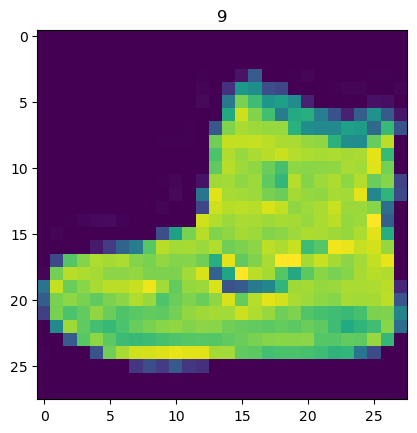

In [58]:
# Visualize image

image, label = train_data[0]
print("Image shape: ", image.shape)
plt.imshow(image.squeeze())
plt.title(label)
#image

# mpl expreccts color channel to be last, or no channel for b/w 

Text(0.5, 1.0, 'Ankle boot')

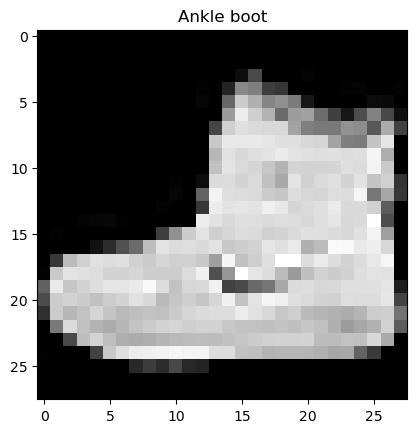

In [59]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

43855
27734
11589
39030
53839
6520
41506
52984
42024
52017
10775
37433
25701
34216
6155
12312


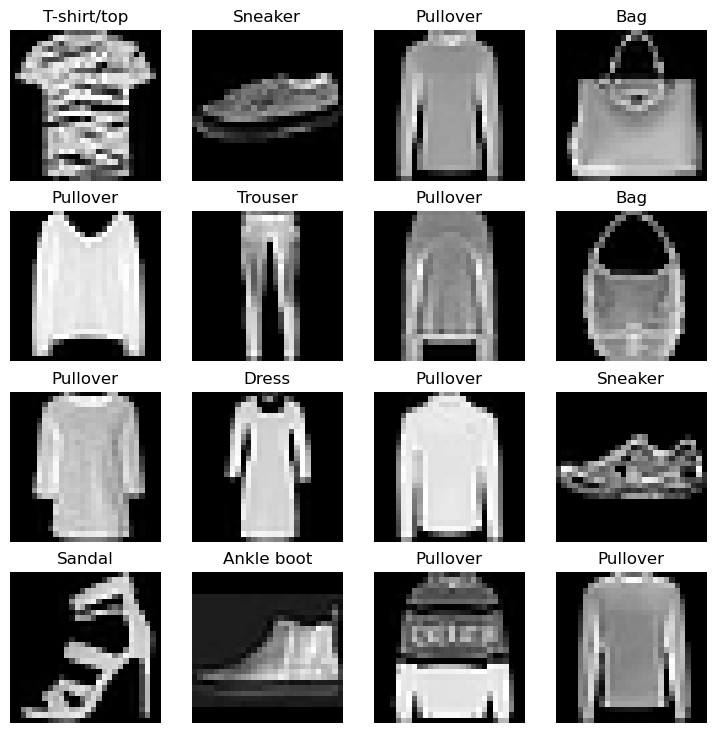

In [60]:
# plot more
torch.manual_seed(57)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows * cols + 1):
    rand_idx = torch.randint(0, len(train_data), size=[1]).item()
    print(rand_idx)
    img, label = train_data[rand_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

In [61]:
# DataLoader
# turns our data into puthon iterable
# basically, make batches/ mini-batches

from torch.utils.data import DataLoader


BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=False)

test_dataloader = DataLoader(dataset=test_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fa044de9210>, <torch.utils.data.dataloader.DataLoader object at 0x7fa04380f310>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [62]:
train_features_batch, train_labels_batches = next(iter(train_dataloader))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


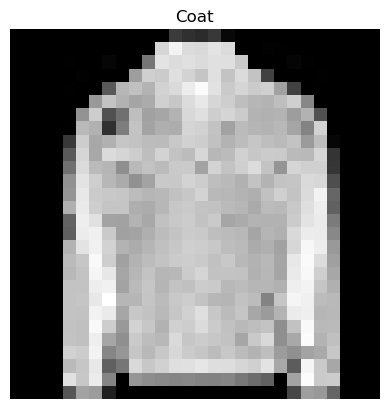

In [63]:
# SHow sample
#torch.manual_seed(57)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batches[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [64]:
# Model

# A baseline model is simple model which can be improvced

flatten_model = nn.Flatten()

# get single sam,ple

x = train_features_batch[0]
x.shape


# Flatten
output = flatten_model(x) # perform forward pass


print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [65]:
from torch import nn

class FashinMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_unit: int,
                 output_shape: int):
        super().__init__()
    
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_unit),
            nn.Linear(in_features=hidden_unit, out_features=output_shape) 
        )

    def forward(self, x):
        return self.layer_stack(x)

In [66]:
torch.manual_seed(42)

model_0 = FashinMNISTModelV0(
    input_shape=28 * 28,
    hidden_unit=10,
    output_shape=len(class_names)
).to("cpu")

In [67]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [68]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [69]:
# loss optimizer and eval metrics

# nn.CrossEntropyLoss
# optimizer : SGD()

#Eval metric: accuracy

In [70]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [71]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [72]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time= end -start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


In [73]:
start_time = timer()
# code
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


1.5644000086467713e-05

In [77]:
# Create a train loop and train on batches
# OPtimizer wwill update a model's param once per batch than once per epoch
 
# Loop through epochs.
# Loop through training batches, perform training steps, calculate the train loss per batch.
# Loop through testing batches, perform testing steps, calculate the test loss per batch.
# Print out what's happening.
# Time it all (for fun).



from tqdm.auto import tqdm

# set seed
torch.manual_seed(57)
train_time_start_on_cpu = timer()


# epochs
epochs = 3

# Create loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}")

    # Training
    train_loss = 0

    # Add a loop to loop through training batchrs
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # fwd pass
        y_pred = model_0(X)

        # loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # optimize the zero grad
        optimizer.zero_grad()

        # loss back
        loss.backward()

        #optimizer
        optimizer.step()

         # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    #epoch loop
    train_loss /= len(train_dataloader)

    # Testing
    lest_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            # Fortward pass
            test_pred = model_0(X_test)

            # loss

            test_loss = loss_fn(test_pred, y_test)

            # Acc
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))


        # test loss avg peer batch
        test_loss /= len(test_dataloader)

        # acc per bartch
        test_acc /= len(test_dataloader)

    #pinrt
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Epoch 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
